In [1]:
# import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import warnings
from IPython.display import clear_output      

warnings.simplefilter("ignore")

In [2]:
# importing the csv files

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("Training Dataset: ")
train.head()

Training Dataset: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Testing Dataset: ")
test.head()

Testing Dataset: 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# checking the missing values in both train and test models

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# checking the shape of the both the datasets

print("Shape of the Trainig Dataset: {0}".format(train.shape))
print("Shape of the Testing Dataset: {0}".format(test.shape))

Shape of the Trainig Dataset: (891, 12)
Shape of the Testing Dataset: (418, 11)


In [8]:
# removing the Cabin, Name, PassengerId and Ticket columns

train = train.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=  "columns")
test = test.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis= "columns")

In [9]:
#percentage of missing additional values

for col in train.columns:
  missing = np.mean(train[col].isnull())
  print("{0} - {1}%".format(col, missing))

Survived - 0.0%
Pclass - 0.0%
Sex - 0.0%
Age - 0.19865319865319866%
SibSp - 0.0%
Parch - 0.0%
Fare - 0.0%
Embarked - 0.002244668911335578%


In [10]:
# removing the missing values

age_missing = train["Age"].isna()
train = train.loc[ -age_missing, :]

embarked_missing = train["Embarked"].isna()
train = train.loc[ -embarked_missing, :]

In [11]:
for col in train.columns:
  missing = np.mean(train[col].isnull())
  print("{0} - {1}%".format(col, missing))

Survived - 0.0%
Pclass - 0.0%
Sex - 0.0%
Age - 0.0%
SibSp - 0.0%
Parch - 0.0%
Fare - 0.0%
Embarked - 0.0%


In [12]:
# splitting the train dataset into x_train and y_train

x_train = train.drop(["Survived"], axis= "columns")
y_train = train.pop("Survived")

In [13]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [14]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
# making x_test and y_test

x_test = test.copy()
y_test = pd.read_csv("gender_submission.csv")

In [16]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [17]:
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
# removing the PassengerId as we only need Survived column

y_test = y_test.drop(["PassengerId"], axis= "columns")

In [19]:
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


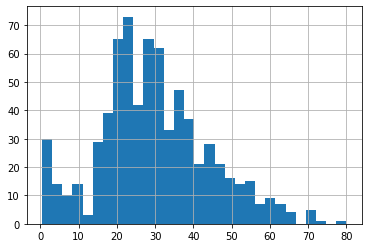

In [20]:
# Visualsising the passengers age

train.Age.hist(bins= 30)

Text(0.5, 0, '% survive')

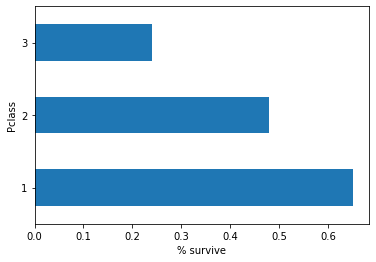

In [21]:
pd.concat([x_train, y_train], axis= 1).groupby("Pclass").Survived.mean().plot(kind= "barh").set_xlabel("% survive")

# the survival of people in the third class is very low

Text(0.5, 0, '% survived')

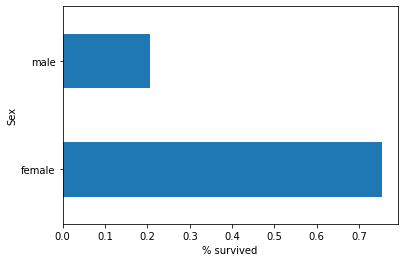

In [22]:
pd.concat([x_train, y_train], axis= 1).groupby("Sex").Survived.mean().plot(kind= "barh").set_xlabel("% survived")

# survival of the male passengers are very low

In [23]:
# to check the dtypes of all the features

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [24]:
# seperating objects and (int or float)

categorical_features = ["Sex", "Embarked"]
numerical_features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

In [25]:
# making a feature column

feature_column = []

for col in categorical_features:
  vocabulary = x_train[col].unique()
  feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(col, vocabulary))

for col in numerical_features:
  feature_column.append(tf.feature_column.numeric_column(col , dtype= tf.float32))

In [26]:
feature_column

[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 NumericColumn(key='Pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [27]:
# input fucntion

def input_fun(data_df, label_df, num_epochs= 15, shuffle= True, batch_size= 32):
  def input():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1200)
    ds = ds.batch(batch_size)
    return ds
  return input

In [28]:
# applying the input function

x_input_train = input_fun(x_train, y_train)
x_input_test = input_fun(x_test, y_test, num_epochs = 1, shuffle = False)

In [29]:
# selecting the machine learning model

lr = tf.estimator.LinearClassifier(feature_columns= feature_column)

In [33]:
# training the dataset

lr.train(x_input_train)

Instructions for updating:
Use standard file utilities to get mtimes.


In [34]:
# testing the predictive model on the testing dataset

result = lr.evaluate(x_input_test)

In [35]:
# accuracy of the predictive model

print("Accuracy of the model: {0}%".format(round(result["accuracy"] * 100, 2)))

Accuracy of the model: 84.69%
